In [44]:
import pandas as pd
import torch
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from skimage.io import imread
from skimage.transform import resize
import os

In [2]:
mass_train=pd.read_csv('/content/drive/MyDrive/mass_case_description_train_set.csv')
mass_train['studyid']=mass_train['image file path'].apply(lambda x: x.split('/')[1])
mass_train['seriesid']=mass_train['image file path'].apply(lambda x: x.split('/')[2])
feature_label_train_mass=mass_train[['studyid','pathology']]

In [ ]:
feature_label_train_mass

In [3]:
def label_fetch(studyid_idx):
  return feature_label_train_mass.pathology[studyid_idx]

In [4]:
feature_label_train_mass.pathology.to_numpy()

array(['MALIGNANT', 'MALIGNANT', 'BENIGN', ..., 'MALIGNANT', 'MALIGNANT',
       'MALIGNANT'], dtype=object)



1.   2nd element or index[1] of splitted image file path variable of description csv files represent **Study ID**.
2.   3rd element or index[2] represent **series iD**



#### **Labels are avaiable in description csv files**

`ds.pixel_array` is a N-dimensional numpy array.

In [ ]:
class Image_Generator(keras.utils.Sequence):
  def __init__(self,start_index=1,stop_index=100,batch_size=5) :
    self.start_index=start_index
    self.stop_index=stop_index
    #self.image_filenames = image_filenames
    self.labels = feature_label_train_mass.pathology[start_index:stop_index]
    self.batch_size = batch_size
    self.idx_array=np.arange(start_index,stop_index+1,1)

  def __len__(self) :
    return (np.ceil((self.stop_index-self.start_index+1) / float(self.batch_size))).astype(np.int)

  def __getitem__(self, idx):
    batch_x = self.idx_array[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    
    return np.array([
            image_fetch(idx_curr)
               for idx_curr in batch_x])/255.0, np.array(batch_y)

In [ ]:
class Label_Generator(keras.utils.Sequence):
  def __init__(self,start_index=1,stop_index=100,batch_size=5) :
    self.start_index=start_index
    self.stop_index=stop_index
    #self.image_filenames = image_filenames
    self.labels = feature_label_train_mass.pathology[start_index:stop_index]
    self.batch_size = batch_size
    self.idx_array=np.arange(start_index,stop_index+1,1)

  def __len__(self) :
    return (np.ceil((self.stop_index-self.start_index+1) / float(self.batch_size))).astype(np.int)

  def __getitem__(self, idx):
    batch_x = self.idx_array[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    
    return np.array([
            image_fetch(idx_curr)
               for idx_curr in batch_x])/255.0, np.array(batch_y)


In [ ]:
class FinalGen(keras.utils.Sequence) :
  def __init__(self, image_filenames, labels, batch_size) :
    self.image_filenames = image_filenames
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    
    return np.array([
            resize(imread('/content/drive/MyDrive/cbis_ddsm/mass/train/' + str(file_name)+'.png'), (225, 225,1))
               for file_name in batch_x])/255.0, np.array(batch_y)

In [ ]:
Image.open(os.listdir()[0])

In [6]:
cd /content/drive/MyDrive/cbis_ddsm/mass/train

/content/drive/MyDrive/cbis_ddsm/mass/train


In [33]:
im_mega_array=[]
for i in range(100):
  print("{}/20".format(i))
  im_mega_array.append(tf.convert_to_tensor(np.array(Image.open(os.listdir()[i]).resize((227,227)))))
im_mega_array=tf.convert_to_tensor(im_mega_array)

0/20
1/20
2/20
3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20
15/20
16/20
17/20
18/20
19/20
20/20
21/20
22/20
23/20
24/20
25/20
26/20
27/20
28/20
29/20
30/20
31/20
32/20
33/20
34/20
35/20
36/20
37/20
38/20
39/20
40/20
41/20
42/20
43/20
44/20
45/20
46/20
47/20
48/20
49/20
50/20
51/20
52/20
53/20
54/20
55/20
56/20
57/20
58/20
59/20
60/20
61/20
62/20
63/20
64/20
65/20
66/20
67/20
68/20
69/20
70/20
71/20
72/20
73/20
74/20
75/20
76/20
77/20
78/20
79/20
80/20
81/20
82/20
83/20
84/20
85/20
86/20
87/20
88/20
89/20
90/20
91/20
92/20
93/20
94/20
95/20
96/20
97/20
98/20
99/20


In [35]:
im_mega_array.shape

TensorShape([100, 227, 227])

In [32]:
label_array=[]
for i in feature_label_train_mass.pathology[:100]:
  if i=='MALIGNANT':
    dig=1
  else:
    dig=0
  label_array.append(dig)
label_array=tf.convert_to_tensor(label_array)

In [29]:
label_array

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int32)>

In [36]:
train_images=im_mega_array[:70]
train_labels=label_array[:70]
test_images=im_mega_array[70:]
test_labels=label_array[70:]

In [71]:
np.random.seed(1000)

#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227, 227,1), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096)) #input_shape=(225*225,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(1))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 57, 57, 96)        11712     
                                                                 
 activation_81 (Activation)  (None, 57, 57, 96)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 29, 29, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 29, 29, 256)       614656    
                                                                 
 activation_82 (Activation)  (None, 29, 29, 256)       0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 15, 15, 256)      0         
 g2D)                                                

In [65]:
# opt=tf.keras.optimizers.SGD(learning_rate=0.00001)
# model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,metrics=["accuracy"])

In [75]:
model.compile(loss=keras.losses.BinaryFocalCrossentropy(from_logits=True), optimizer='adam', metrics=["accuracy"])

In [40]:
test_labels 

<tf.Tensor: shape=(30,), dtype=int32, numpy=
array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0], dtype=int32)>

In [76]:
model.fit(train_images, train_labels,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 18s 5s/step - loss: 21836.5117 - accuracy: 0.5143
Epoch 2/10
3/3 [==============================] - 15s 4s/step - loss: 23.4302 - accuracy: 0.5143
Epoch 3/10
3/3 [==============================] - 16s 5s/step - loss: 2.7495 - accuracy: 0.5143
Epoch 4/10
3/3 [==============================] - 15s 4s/step - loss: 1.1641 - accuracy: 0.5143
Epoch 5/10
3/3 [==============================] - 15s 4s/step - loss: 0.4467 - accuracy: 0.5143
Epoch 6/10
3/3 [==============================] - 15s 4s/step - loss: 0.1430 - accuracy: 0.5143
Epoch 7/10
3/3 [==============================] - 16s 5s/step - loss: 0.1550 - accuracy: 0.5143
Epoch 8/10
3/3 [==============================] - 15s 4s/step - loss: 0.1453 - accuracy: 0.5143
Epoch 9/10
3/3 [==============================] - 15s 4s/step - loss: 0.1170 - accuracy: 0.5143
Epoch 10/10
3/3 [==============================] - 17s 5s/step - loss: 0.1133 - accuracy: 0.5143


In [ ]:
# model.fit(im_mega_array,label_array)
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

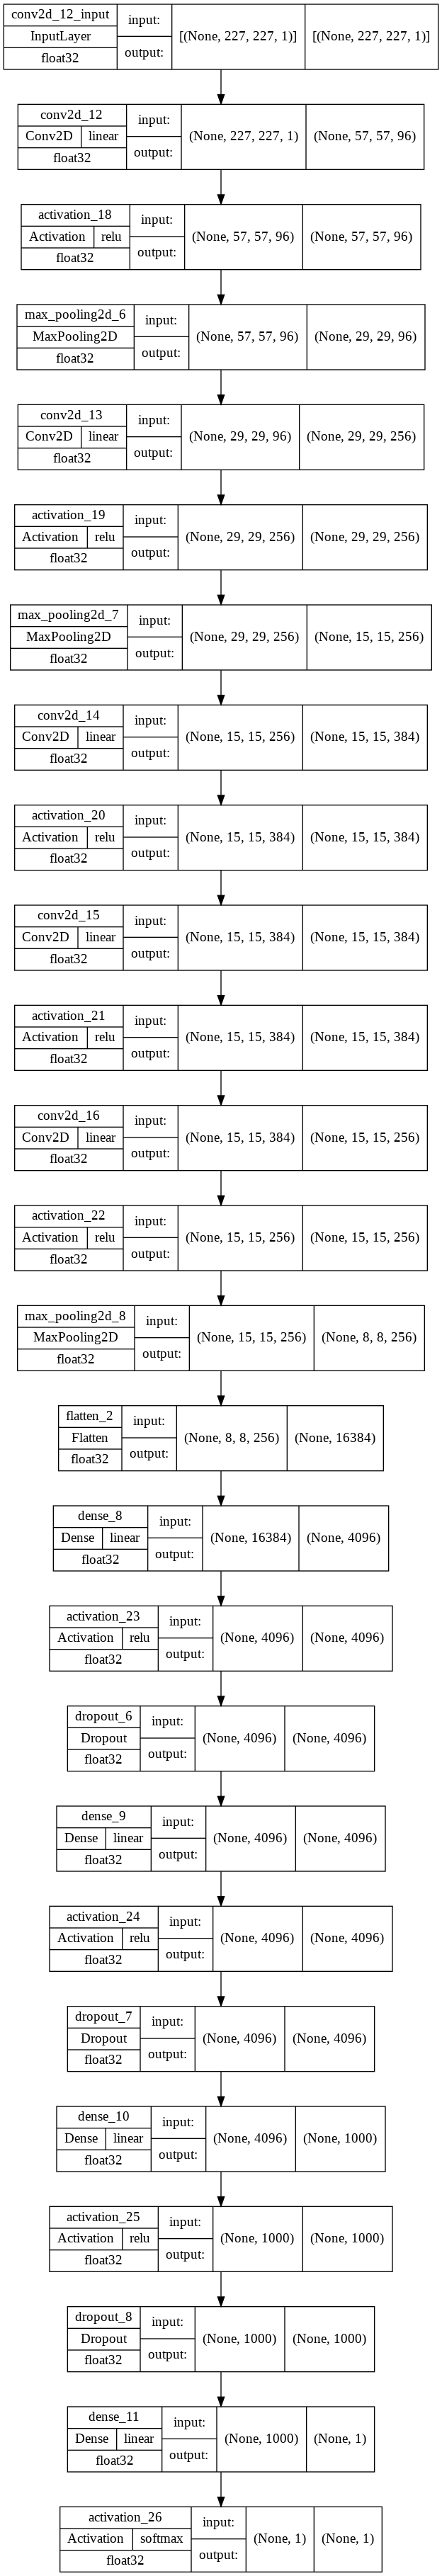

In [24]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96, layer_range=None, show_layer_activations=True)

In [ ]:
# im,lb=FinalGen(feature_label_train_mass.studyid,feature_label_train_mass.pathology,10)

In [ ]:
# asd=FinalGen(feature_label_train_mass.studyid,feature_label_train_mass.pathology,10)

In [ ]:
model.fit(im,lb)

NameError: ignored

In [ ]:
# model.fit_generator(generator=asd)

In [ ]:
# model0 = keras.applications.Xception(
#     weights='imagenet',
#     include_top=False,
#       # Load weights pre-trained on ImageNet.
#     input_shape=(299, 299,1))

In [ ]:
# ........ 

Using cpu device
